# Stack Overflow & MOOC Platforms Analysis

The Data Science and Software space is constantly evolving, with new technologies created, existing tools improving and new discoveries being made every other week. StackOverflow has been a constant source of information, questions and discussion for developers. Although there is a decrease in the popularity of the platform since the inception of LLMs (~50%), it still remains a staple in many software enthusiast toolkits.

As the world becomes increasingly digital and online, we have seen a shift in the landscape of work and learning, with many employees and students moving to remote/ online platforms. As such, there is a distinct rise in the rise of Massive Online Open Course (MOOC) sites, as users turn to upskill themselves from the comfort of their own homes.

As MADS students who are both part of the online learning community and avid users of StackOverflow, we want to investigate the trends of the Software Development and Data Science industries by looking at trends within StackOverflow, and identify how online education has evolved over time.

# Content

- [Load Data](#load-data)
- [EDA for Stack Overflow](#eda-for-stack-overflow)
- [EDA for MOOC](#eda-for-mooc)
  * [Summary Plots](#summary-plots)
  * [Histogram Plots](#histogram-plots)
  * [Word Cloud](#word-cloud)
- [Question 1](#q1-are-the-most-popular-skills-in-mooc-educational-content-the-same-skills-that-are-most-widely-used-according-to-the-survey)
  * [Insights](#q1-insights)
  * [Additional Investigation](#q1-additional-investigation)
- [Question 2](#q2-what-tools-did-developers-of-different-levels-use)
  * [Insights](#q2-insights)
  * [Additional Investigation](#q2-additional-investigation)
- [Question 3](#q3-are-there-sufficient-courses-at-each-skill-level)
  * [Insights](#q3-insights)
  * [Additional Investigation](#q3-additional-investigation)
- [Question 4](#q4-how-long-does-it-take-to-develop-these-skills)
  * [Insights](#q4-insights)
  * [Additional Investigation](#q4-additional-investigation)

# Load Data

Here we define the packages required to conduct the analysis and load the 2 relevant data sources in

In [2]:
CLEAN_PATH = "data/clean"

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from ast import literal_eval
from wordcloud import WordCloud
from pywaffle import Waffle

# Optional packages for additional analysis
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

# try:
#   print(stopwords.words('english'))
# except Exception:
#   nltk.download('stopwords')
#   nltk.download('punkt_tab')
#   print(stopwords.words('english'))

In [4]:
# Load the MOOC and SO datasets
df_mooc = pd.read_csv(f'{CLEAN_PATH}/combined_mooc.csv', low_memory=False)
df_so = pd.read_csv(f'{CLEAN_PATH}/survey_results.csv')

[TOC](#content)

---

# EDA for Stack Overflow

Here we try and get a sense of the available Stack Overflow survey data in 2024. Every year since 2011, StackOverflow has conducted a survey of StackOverflow users to gather information on their work experience, technology proficiencies, job satisfaction, and other questions.

In [5]:
# Start by looking at the columns and the data contained within those columns
print(df_so.columns)
df_so.head()

Index(['ResponseId', 'CodingStatus', 'AgeRange', 'EducationLevel', 'Country',
       'DevType', 'Employment', 'Industry', 'CodingActivities', 'YearsCoding',
       'YearsCodingProfessional', 'YearsWorkExperience', 'HowLearnCode',
       'HowLearnCodeOnline', 'LanguagesUsedPastYear', 'DatabasesUsedPastYear',
       'PlatformsUsedPastYear', 'WebFrameworksUsedPastYear', 'Currency',
       'CompTotal', 'ConvertedCompYearly'],
      dtype='object')


,ResponseId,CodingStatus,AgeRange,EducationLevel,Country,DevType,Employment,Industry,CodingActivities,YearsCoding,...,YearsWorkExperience,HowLearnCode,HowLearnCodeOnline,LanguagesUsedPastYear,DatabasesUsedPastYear,PlatformsUsedPastYear,WebFrameworksUsedPastYear,Currency,CompTotal,ConvertedCompYearly
0,1,I am a developer by profession,Under 18 years old,Primary/elementary school,United States of America,NaN,"['Employed, full-time']",NaN,['Hobby'],NaN,...,NaN,['Books / Physical media'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United Kingdom of Great Britain and Northern I...,"Developer, full-stack","['Employed, full-time']",NaN,"['Hobby', 'Contribute to open-source projects'...",20,...,17.0,"['Books / Physical media', 'Colleague', 'On th...","['Technical documentation', 'Blogs', 'Books', ...","['Bash/Shell (all shells)', 'Go', 'HTML/CSS', ...","['Dynamodb', 'MongoDB', 'PostgreSQL']","['Amazon Web Services (AWS)', 'Heroku', 'Netli...","['Express', 'Next.js', 'Node.js', 'React']",NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",United Kingdom of Great Britain and Northern I...,Developer Experience,"['Employed, full-time']",NaN,"['Hobby', 'Contribute to open-source projects'...",37,...,NaN,"['Books / Physical media', 'Colleague', 'On th...","['Technical documentation', 'Blogs', 'Books', ...",['C#'],['Firebase Realtime Database'],['Google Cloud'],['ASP.NET CORE'],NaN,NaN,NaN
3,4,I am learning to code,18-24 years old,Some college/university study without earning ...,Canada,"Developer, full-stack","['Student, full-time']",NaN,NaN,4,...,NaN,"['Other online resources (e.g., videos, blogs,...","['Stack Overflow', 'How-to videos', 'Interacti...","['C', 'C++', 'HTML/CSS', 'Java', 'JavaScript',...","['MongoDB', 'MySQL', 'PostgreSQL', 'SQLite']","['Amazon Web Services (AWS)', 'Fly.io', 'Heroku']","['jQuery', 'Next.js', 'Node.js', 'React', 'Wor...",NaN,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Secondary school (e.g. American high school, G...",Norway,"Developer, full-stack","['Student, full-time']",NaN,NaN,9,...,NaN,"['Other online resources (e.g., videos, blogs,...","['Technical documentation', 'Blogs', 'Written ...","['C++', 'HTML/CSS', 'JavaScript', 'Lua', 'Pyth...","['PostgreSQL', 'SQLite']",NaN,NaN,NaN,NaN,NaN


In [6]:
df_so.describe()

,ResponseId,YearsWorkExperience,CompTotal,ConvertedCompYearly
count,65437.000000,29658.000000,3.374000e+04,2.343500e+04
mean,32719.000000,11.466957,2.963841e+145,8.615529e+04
std,18890.179119,9.168709,5.444117e+147,1.867570e+05
min,1.000000,0.000000,0.000000e+00,1.000000e+00
25%,16360.000000,4.000000,6.000000e+04,3.271200e+04
50%,32719.000000,9.000000,1.100000e+05,6.500000e+04
75%,49078.000000,16.000000,2.500000e+05,1.079715e+05
max,65437.000000,50.000000,1.000000e+150,1.625660e+07


[TOC](#content)

---

# EDA for MOOC

Here we explore the data available and gain some insight about the MOOC dataset. The MOOC dataset consists of course information from multiple online learning platforms. Details include the the organization that curated the course, duration of the course and review details.

## Summary Plots

In [7]:
# Convert string columns to list types
cols_to_convert = ['skills', 'reviews', 'subject', 'reviews_comments', 'reviews_stars']
for col in cols_to_convert:
  df_mooc[col] = df_mooc[col].apply(lambda x: literal_eval(x) if not pd.isna(x) else x)

In [8]:
# Data processing to generate plots
count_type = df_mooc['type'].value_counts()
count_type = pd.DataFrame(count_type).reset_index()

count_organization = df_mooc['organization'].value_counts()
count_organization = pd.DataFrame(count_organization).reset_index()
top_10_organization = count_organization.iloc[:10].sort_values('count')

count_level = df_mooc['level'].value_counts()
count_level = count_level.reindex(index=['Mixed', 'Advanced', 'Intermediate', 'Beginner'])
count_level = pd.DataFrame(count_level).reset_index()

count_provider = df_mooc['provider'].value_counts().sort_values()
count_provider = pd.DataFrame(count_provider).reset_index()

count_languages = df_mooc['language'].value_counts().sort_values()
count_languages = pd.DataFrame(count_languages).reset_index()
top_10_languages = count_languages.iloc[-10:]

count_premium = df_mooc['premium'].value_counts().sort_values()
count_premium = pd.DataFrame(count_premium).reset_index()
count_premium['premium'] = ['Free', 'Paid']

all_skills = np.concatenate(df_mooc['skills'].dropna().to_numpy())
all_skills = np.unique(all_skills, return_counts=True)
all_skills = {
  'skills': all_skills[0],
  'count': all_skills[1]
}
all_skills = pd.DataFrame(all_skills).sort_values('count')
top_20_skills = all_skills.iloc[-20:]

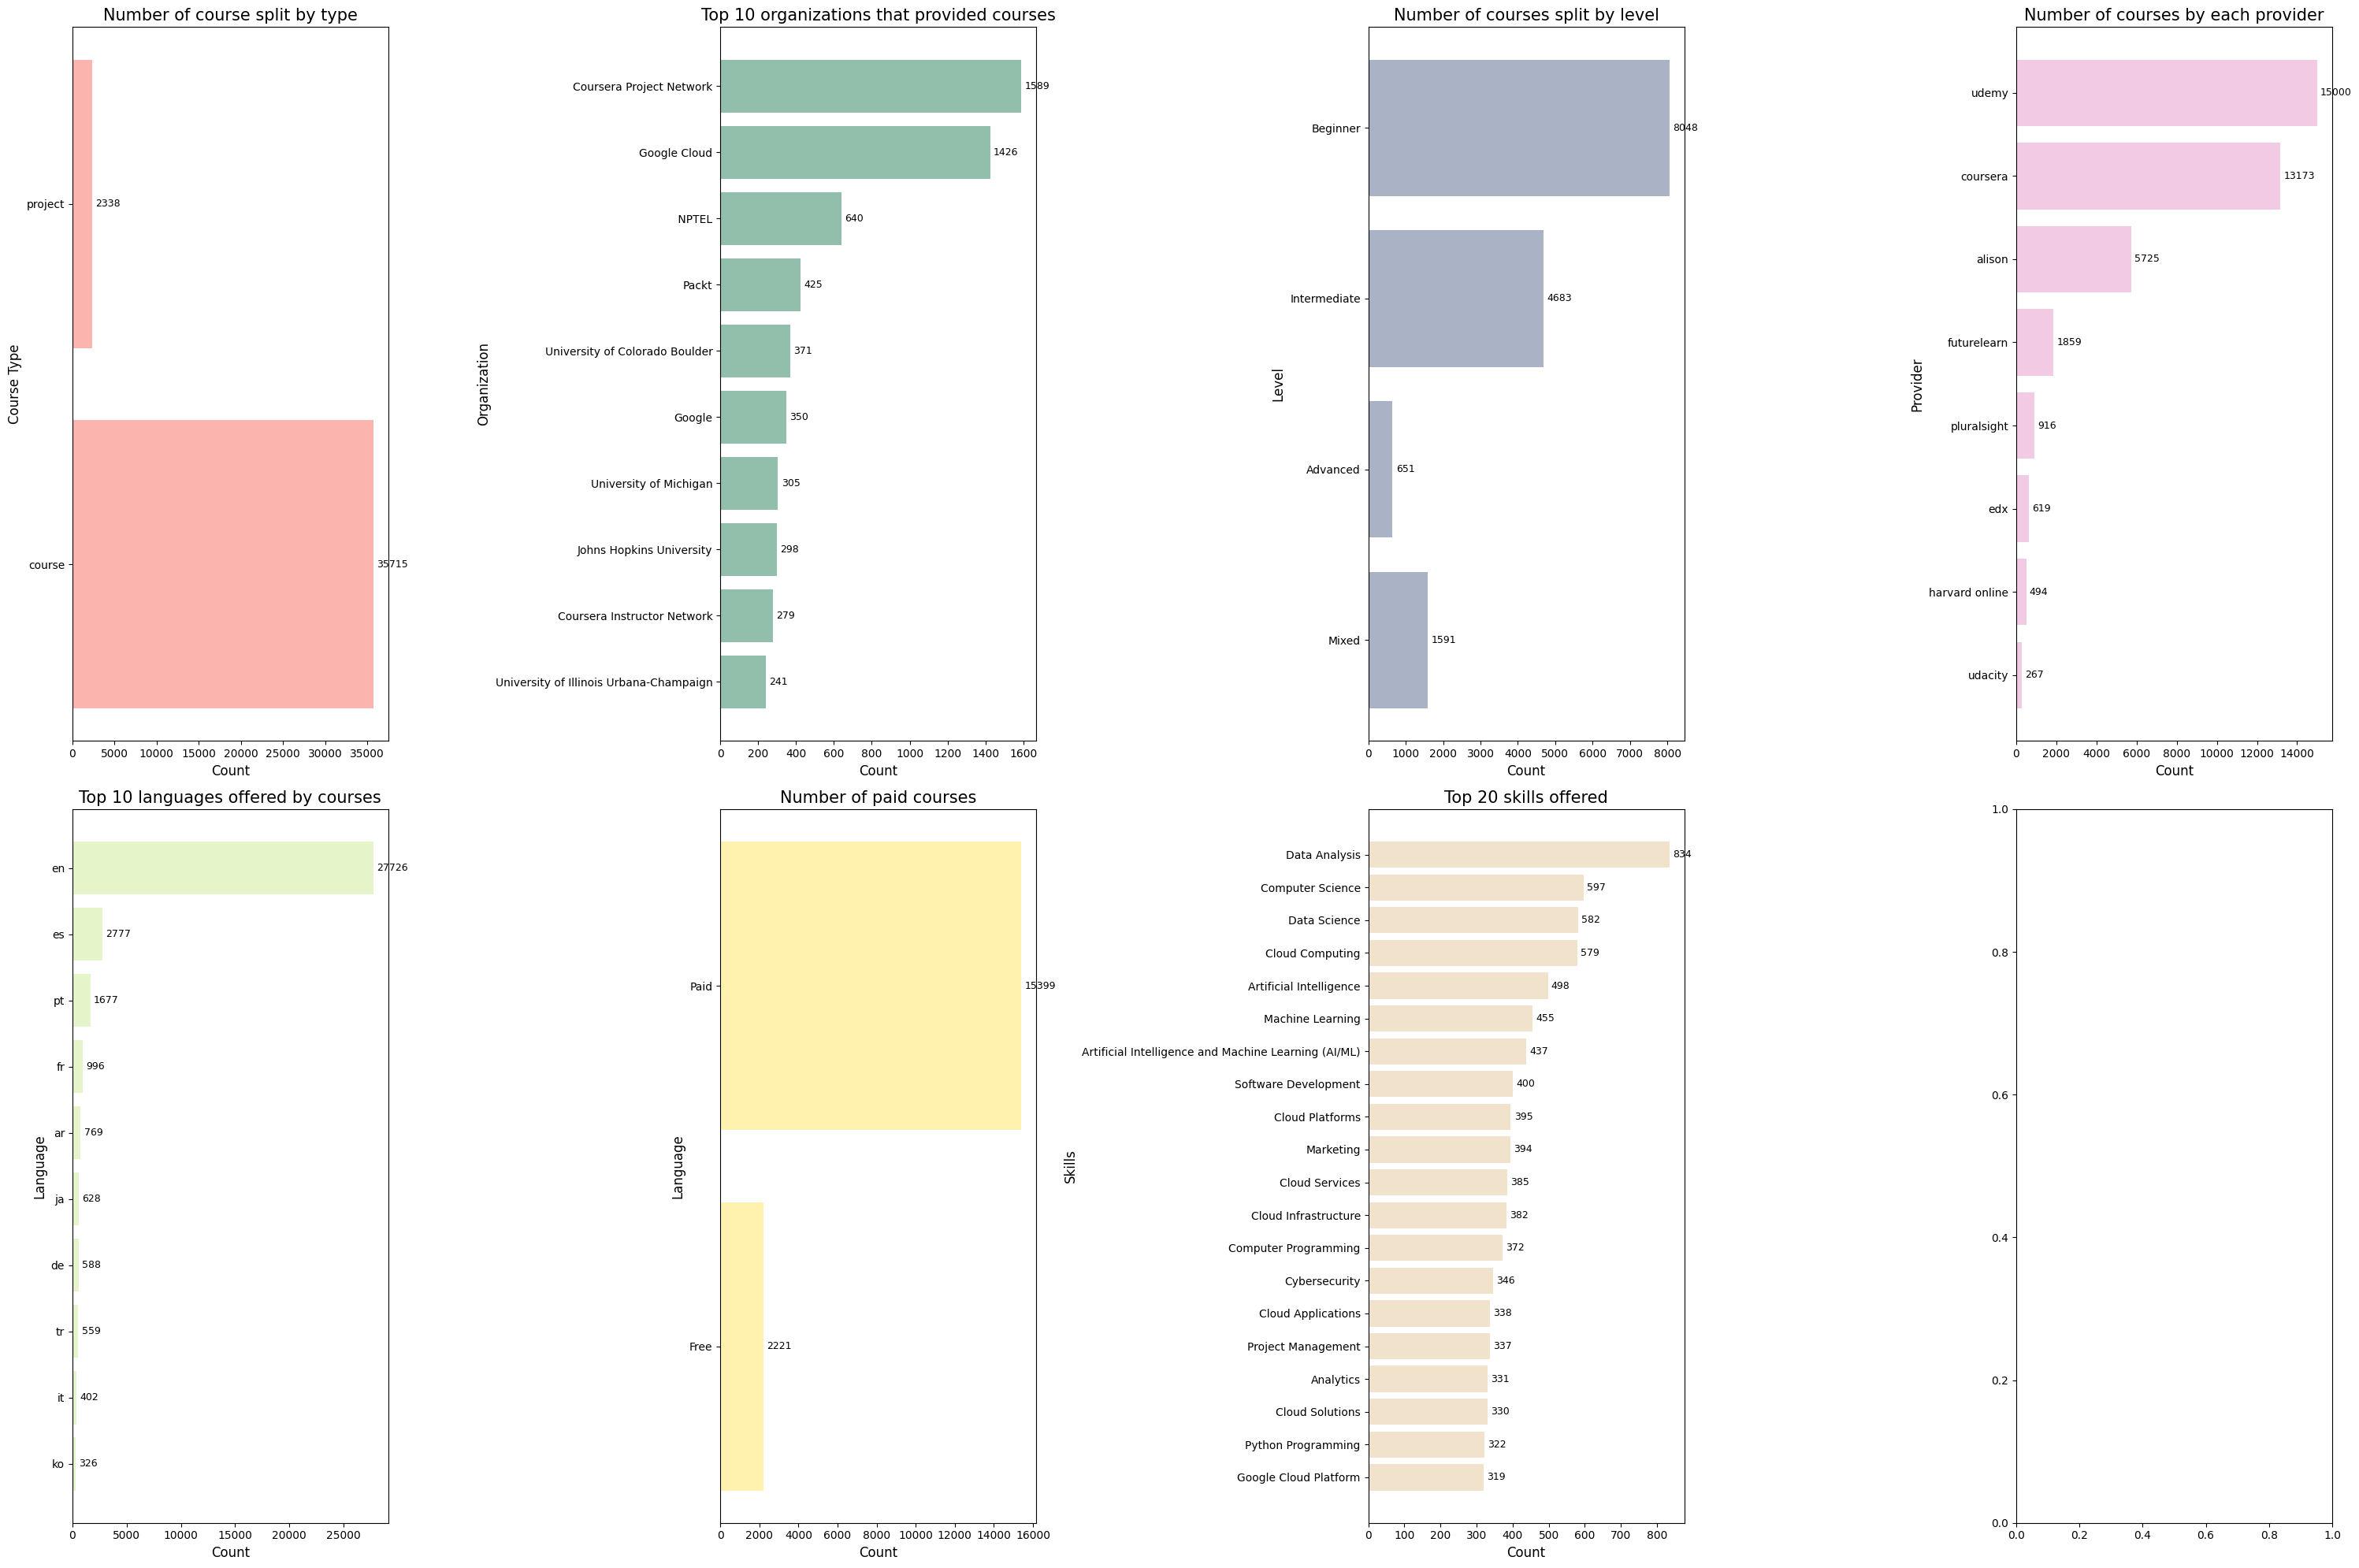

In [9]:
# Define global variables
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=plt.cm.Pastel1.colors)
FS = 12

fig, ax = plt.subplots(nrows=2, ncols=4)
fig.set_figheight(20)
fig.set_figwidth(30)

# 1. Countplot of type column
bars = ax[0, 0].barh(count_type['type'], count_type['count'])
for bar in bars:
  width = bar.get_width()
  y = bar.get_y() + bar.get_height() / 2
  ax[0, 0].annotate(f'{width}', xy=(width, y), xytext=(3, 0), textcoords='offset points', va='center', fontsize=FS-3)
ax[0, 0].set_title("Number of course split by type", fontsize=FS+3)
ax[0, 0].set_ylabel("Course Type", fontsize=FS)
ax[0, 0].set_xlabel("Count", fontsize=FS)

# 2. Countplot of organisation column
bars = ax[0, 1].barh(top_10_organization['organization'], top_10_organization['count'], color="#92bfab")
for bar in bars:
  width = bar.get_width()
  y = bar.get_y() + bar.get_height() / 2
  ax[0, 1].annotate(f'{width}', xy=(width, y), xytext=(3, 0), textcoords='offset points', va='center', fontsize=FS-3)
ax[0, 1].set_title("Top 10 organizations that provided courses", fontsize=FS+3)
ax[0, 1].set_ylabel("Organization", fontsize=FS)
ax[0, 1].set_xlabel("Count", fontsize=FS)

# 3. Countplot of level column
bars = ax[0, 2].barh(count_level['level'], count_level['count'], color="#a9b3c5")
for bar in bars:
  width = bar.get_width()
  y = bar.get_y() + bar.get_height() / 2
  ax[0, 2].annotate(f'{width}', xy=(width, y), xytext=(3, 0), textcoords='offset points', va='center', fontsize=FS-3)
ax[0, 2].set_title("Number of courses split by level", fontsize=FS+3)
ax[0, 2].set_ylabel("Level", fontsize=FS)
ax[0, 2].set_xlabel("Count", fontsize=FS)

# 4. Countplot of provider column
bars = ax[0, 3].barh(count_provider['provider'], count_provider['count'], color="#f3cae4")
for bar in bars:
  width = bar.get_width()
  y = bar.get_y() + bar.get_height() / 2
  ax[0, 3].annotate(f'{width}', xy=(width, y), xytext=(3, 0), textcoords='offset points', va='center', fontsize=FS-3)
ax[0, 3].set_title("Number of courses by each provider", fontsize=FS+3)
ax[0, 3].set_ylabel("Provider", fontsize=FS)
ax[0, 3].set_xlabel("Count", fontsize=FS)

# 5. Countplot of languages column
bars = ax[1, 0].barh(top_10_languages['language'], top_10_languages['count'], color="#e5f5c9")
for bar in bars:
  width = bar.get_width()
  y = bar.get_y() + bar.get_height() / 2
  ax[1, 0].annotate(f'{width}', xy=(width, y), xytext=(3, 0), textcoords='offset points', va='center', fontsize=FS-3)
ax[1, 0].set_title("Top 10 languages offered by courses", fontsize=FS+3)
ax[1, 0].set_ylabel("Language", fontsize=FS)
ax[1, 0].set_xlabel("Count", fontsize=FS)

# 6. Countplot of premium column
bars = ax[1, 1].barh(count_premium['premium'], count_premium['count'], color="#fff2ae")
for bar in bars:
  width = bar.get_width()
  y = bar.get_y() + bar.get_height() / 2
  ax[1, 1].annotate(f'{width}', xy=(width, y), xytext=(3, 0), textcoords='offset points', va='center', fontsize=FS-3)
ax[1, 1].set_title("Number of paid courses", fontsize=FS+3)
ax[1, 1].set_ylabel("Language", fontsize=FS)
ax[1, 1].set_xlabel("Count", fontsize=FS)

# 7. Top 20 skills
bars = ax[1, 2].barh(top_20_skills['skills'], top_20_skills['count'], color="#f1e2cc")
for bar in bars:
  width = bar.get_width()
  y = bar.get_y() + bar.get_height() / 2
  ax[1, 2].annotate(f'{width}', xy=(width, y), xytext=(3, 0), textcoords='offset points', va='center', fontsize=FS-3)
ax[1, 2].set_title("Top 20 skills offered", fontsize=FS+3)
ax[1, 2].set_ylabel("Skills", fontsize=FS)
ax[1, 2].set_xlabel("Count", fontsize=FS)

fig.tight_layout()


From the Top 20 skills offered graph, 18/20 of the skills are software related (only Marketing and Project Management are not). This falls in line with our expectations since majority of the skills required to perform such roles are online-based, so it lands itself well for online platforms as a medium for teaching such skills.

Meanwhile there are a lot more paid courses compared to free ones. Considering that many of these platforms advertise free learning with paid certificates, we assumed that the split might have been more even. However, since these platforms still need income to survive, it's not a surprising find.

There are also a lot more beginner courses compared to the other levels. One possible explanation would be that "Beginner" skills are easier to communicate and invite less questions or have readily available responses online compared to "Advanced" skills which might be more nuanced. These "Advanced" skills might be better communicated through in person lessons, where 2-way communication is much easier.

However, some biases exist that skew these plots. For example, due to the uneven distribution of courses from different providers (e.g Coursera & udemy have >10,000 courses, while EdX and Udacity have <1,000) the top organizations that curated these courses are from Coursea-related providers.

## Histogram Plots

The histograms here provide a distribution of numerical data. We explore the distribution of ratings, duration and review ratings across the entire MOOC dataset

In [10]:
def custom_hist_kde_plot(
  data: pd.Series,
  box_color: str,
  line_color: str,
  title: str,
  axes: list
):
  # Define the base histogram + kde plot
  plot = sns.histplot(data, kde=True, bins=40, color=box_color, line_kws={'color': 'red'}, ax=axes)
  plot.lines[0].set_color(line_color)
  plt.setp(plot.patches, linewidth=0.5)

  # Add the mean line
  mean = np.mean(data)
  plot.axvline(mean, color='#33a02c')
  scaled_x_pos = mean - 0.01 * mean
  scaled_y_pos = plot.get_ylim()[1] - 0.02*plot.get_ylim()[1]
  plot.text(scaled_x_pos, scaled_y_pos, f"Mean:\n{round(mean, 2)}", color='#33a02c', ha='right', va='top')

  # Add the median line
  median = np.median(data)
  plot.axvline(median, color='#1e78b4')
  scaled_x_pos = median - 0.01 * median
  scaled_y_pos = plot.get_ylim()[1] - 0.15*plot.get_ylim()[1]
  plot.text(scaled_x_pos, scaled_y_pos, f"Median:\n{round(median, 2)}", color='#1e78b4', ha='right', va='top')

  # Title
  plot.set_title(title)

  return plot

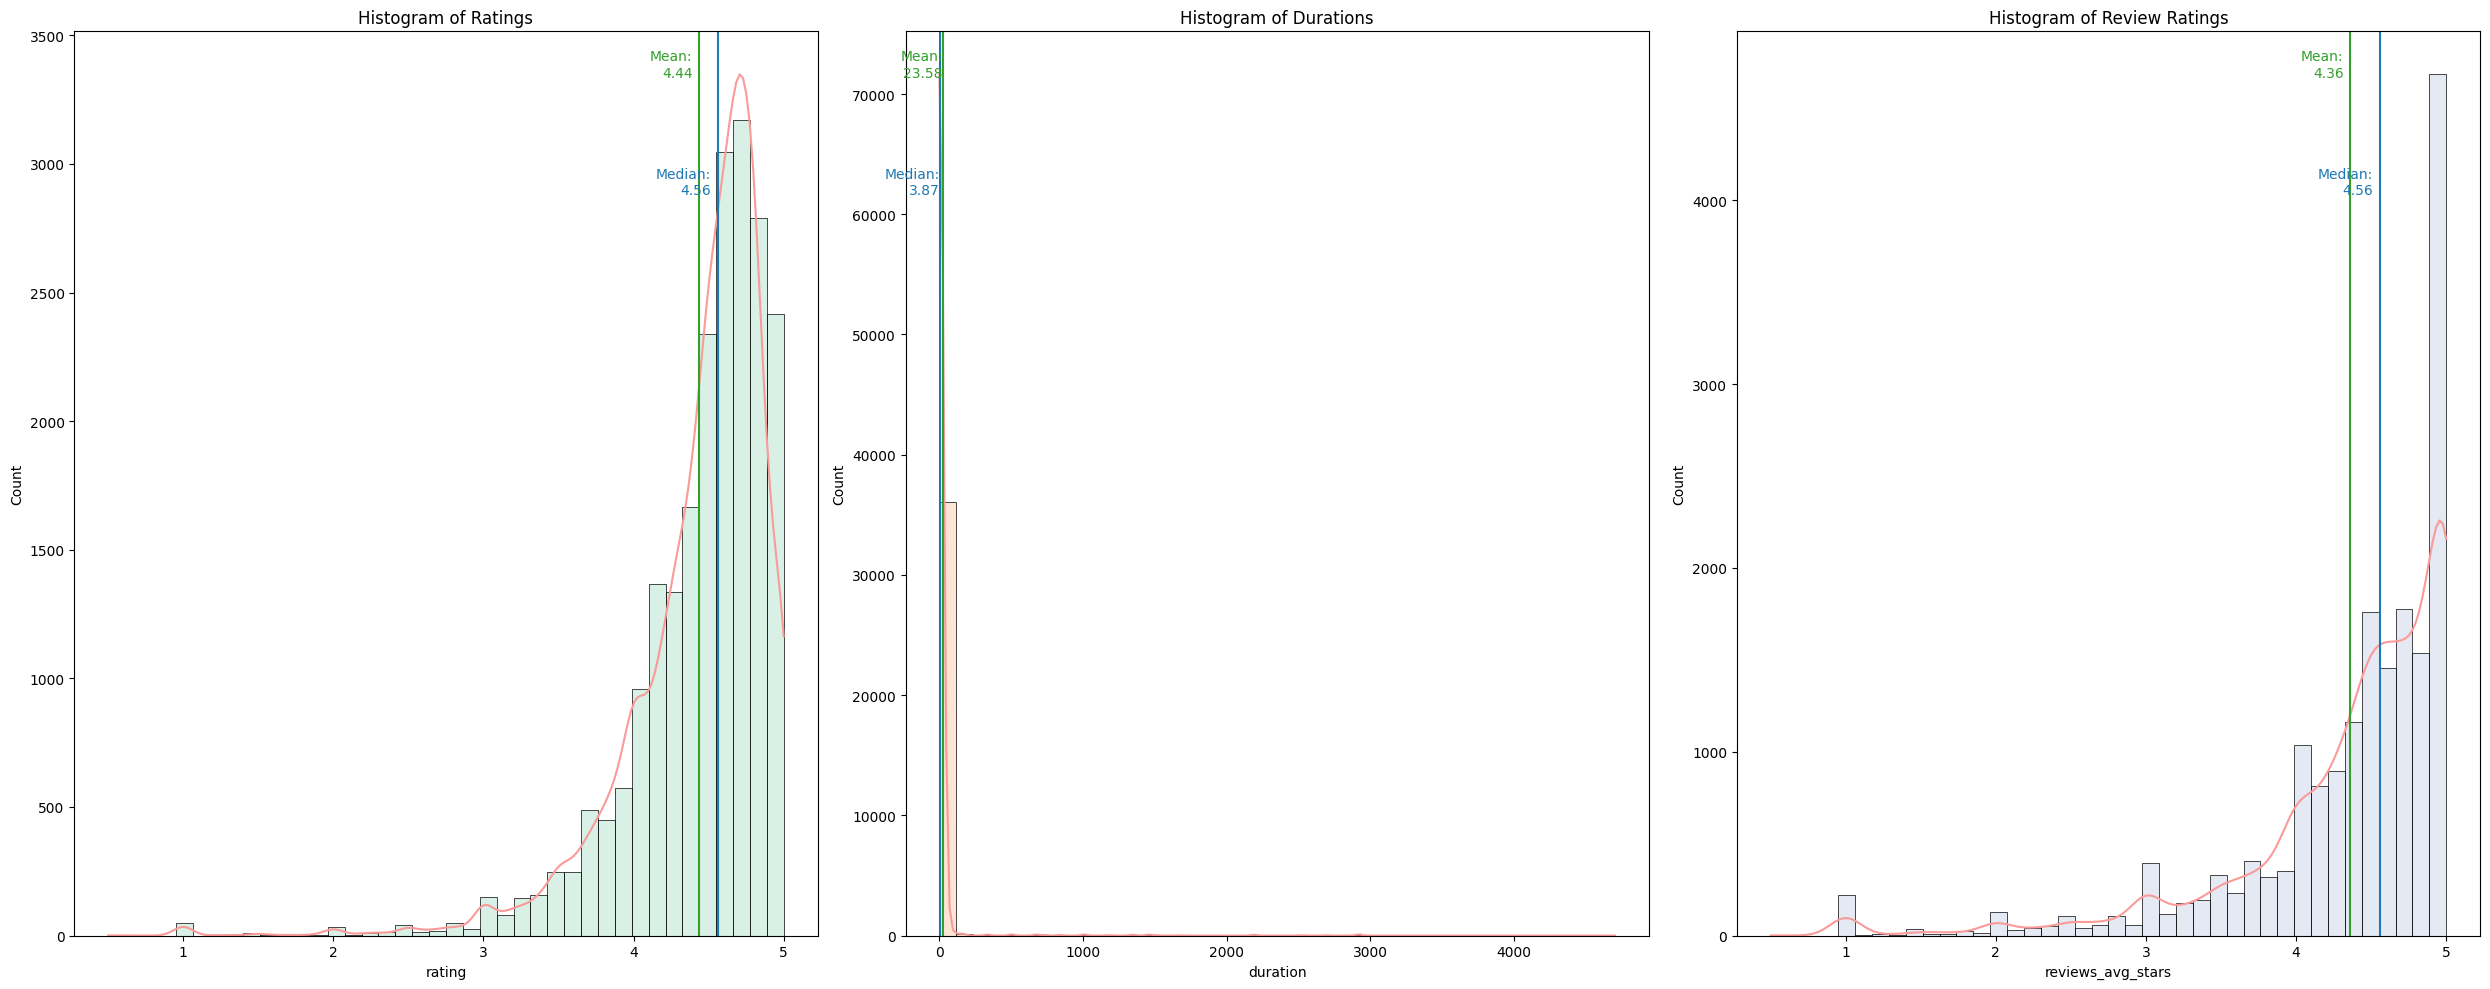

In [11]:
# Density based plots
ratings = df_mooc['rating'].dropna()
duration = df_mooc['duration'].dropna()
reviews_stars = df_mooc['reviews_avg_stars'].dropna()

# Define figure
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(25)

# Specify plots
custom_hist_kde_plot(ratings, box_color='#b3e2cd', line_color='#fa9a99', title='Histogram of Ratings', axes=ax[0])
custom_hist_kde_plot(duration, box_color='#fdcdac', line_color='#fa9a99', title='Histogram of Durations', axes=ax[1])
custom_hist_kde_plot(reviews_stars, box_color='#cbd5e8', line_color='#fa9a99', title='Histogram of Review Ratings', axes=ax[2])

fig.tight_layout()

Generally across both rating and review ratings, most courses are highly rated with the mean score being 4.44 and 4.36 respectively. This suggests that any score below 4 might already be a poorly designed/ run course.

The duration curve is hard to observe since it contains outliers causing the histogram to be right-skewed. As such, it's difficult to observe the true distribution of duration for courses. However, with a median value of 3.87, we can assume that many courses are actually shorter.

## Word Cloud

Since descriptions for courses are harder to interpret, we use a word cloud as a visual representation that indicates common "topics" across the courses. The larger the word, the more common the topic across all courses

⚠️ NOTE: Every run is different for the wordcloud

In [12]:
# Use only english courses
course_desc = df_mooc[df_mooc['language'] == 'en']
course_desc = course_desc['description'].dropna().reset_index(drop=True)

# Randomly select 50 course descriptions
n = 50
np.random.seed(42)
idx = np.random.choice(range(course_desc.shape[0]), n)
course_desc = course_desc.iloc[idx]

# Merge descriptions into 1 large text
all_desc = ""
for sent in course_desc:
  all_desc += sent

# # Optional: Remove stop words
# word_tokens = word_tokenize(all_desc)
# stop_words = set(stopwords.words('english'))
# filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
# all_desc = " ".join(filtered_sentence)

(-0.5, 399.5, 199.5, -0.5)

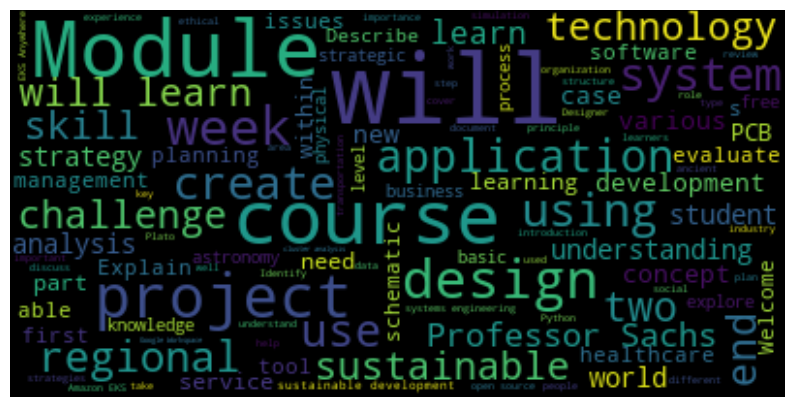

In [13]:
wordcloud = WordCloud(max_font_size=50).generate(all_desc)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

For course descriptions, we see common words like "Course", "Project" and "Application" that appear regardless of industry. One interesting word that stands out is Snokeflake, an AI Data Cloud company, which could suggest that it either they host a lot of training videos on online platforms, or that the platform is very in-demand resulting in many courses being created for their product.

[TOC](#content)

---

# Q1: Are the most popular skills in MOOC educational content the same skills that are most widely used according to the survey?

For each skill in the survey, calculate a “popularity score” as the percentage of survey respondents who are proficient in that skill out of the total number of respondents. The same can be applied to MOOC content, where each skill is assigned the percentage of courses that teach that skill out of the total number of technical courses. We can then compare these with a scatter plot where each axis represents the relative popularity of the topic in the developer survey or the MOOC content.

We perform the following steps:

1. Manipulation on MOOC data
2. Manipulation on Survey data
3. Generate a list of skills for the MOOC dataset
4. Select relevant columns and drop NaN'sant columns and drop NaN'sant columns and drop NaN's
5. Compare skills between MOOCs and Survey results

### 1. Manipulation on MOOC data

Our goal in this step is to get a sense of the MOOC data as it relates to the question we are investigating.

In [14]:
# We know we will want to keep course_name, skills, and enrollments.
# We know we can drop organization, rating, description, level, duration, reviews, provider, 
#   reviews_comments, reviews_stars, reviews_avg_stars, num_reviews, and premium.
# We should explore type, subject, and language to see if they are relevant for our analysis.

moocs = df_mooc[['course_name', 'skills', 'enrollments', 'type', 'subject', 'language']]

In [15]:
# Let's check what's in the type column
moocs['type'].value_counts()

type
course     35715
project     2338
Name: count, dtype: int64

In [16]:
# Projects are mini-courses aimed at guiding a student to build a specific project.
# We will analyze the skills of both together, so we can drop this column.
moocs = moocs.drop('type', axis=1)

In [17]:
# Let's check the enrollments columns
enrollments = moocs['enrollments']
print(f'There are {sum(enrollments.isna())} NaNs in the enrollments column.')
enrollments.describe()

There are 16709 NaNs in the enrollments column.


count    2.134400e+04
mean     5.190766e+03
std      2.168492e+04
min      0.000000e+00
25%      6.400000e+01
50%      6.080000e+02
75%      3.150000e+03
max      1.108811e+06
Name: enrollments, dtype: float64

We will leave the `enrollments` column as-is. There are two ways we can calculate popularity:

1. Sum the total number of enrollments in courses covering the skill.
2. Count how many courses cover the skill.

Since #2 would benefit from the courses with missing enrollments, we will not drop the rows with missing enrollment numbers.

In [18]:
# Now let's check the subject.
print(f"There are {sum(moocs['subject'].isna())} NaNs in the subjects column.")

first_subject = moocs['subject'][moocs['subject'].notna()].iloc[0]
print(f'The type of {first_subject} is {type(first_subject)}.')

There are 16215 NaNs in the subjects column.
The type of ['Business & Management', 'Economics & Finance'] is <class 'list'>.


In [19]:
# And now let's see what the column actually contains.
moocs['subject'].explode().value_counts()[:10]

subject
Personal Development      2380
Development               2227
IT & Software             2178
Business                  1928
Teaching & Academics      1889
Business & Management     1776
Education                 1171
Information Technology    1164
Design                    1124
Marketing                  908
Name: count, dtype: int64

There are lots of subjects that are relevant to our analysis, and lots of subjects that are not. Instead of combing through each subject to hand-pick the ones that are relevant, we will stick to our strategy of looking for skills in the title of the course. We can drop the subject.

In [20]:
moocs = moocs.drop('subject', axis=1)

In [21]:
# Lastly, let's take a look at language.
moocs['language'].value_counts()[:10]

language
en    27726
es     2777
pt     1677
fr      996
ar      769
ja      628
de      588
tr      559
it      402
ko      326
Name: count, dtype: int64

In [22]:
# Since there are enough courses in English and the survey is English, let's use only the courses in English.
# That will prevent any potential issues of not translating a skill to a different language.
moocs = moocs[moocs['language'].eq('en')]

# Now we can drop the language column
moocs = moocs.drop('language', axis=1)

In [23]:
# Drop any duplicates
print(f"Dropping {sum(moocs.duplicated('course_name'))} duplicates.")
moocs = moocs.drop_duplicates('course_name')

Dropping 1328 duplicates.


In [24]:
print(f'Our final MOOC dataset includes {len(moocs)} courses.')
moocs.head()

Our final MOOC dataset includes 26398 courses.


,course_name,skills,enrollments
1,Assisting Public Sector Decision Makers With ...,"[Simulations, Statistical Analysis, Predictive...",NaN
2,Advanced Strategies for Sustainable Business,"[Circular Economy, Sustainable Business, Stake...",NaN
4,Automate Blog Advertisements with Zapier,"[Advertising, Social Media, Blogging, Marketing]",NaN
5,Applied Sustainability Engineering,"[Product Engineering, Sustainable design, Life...",NaN
7,Advanced Topics in Derivative Pricing,"[Volatility Smile, Computer Programming, Impli...",NaN


We can see these skills are pretty high-level categorical skills. For example, Computer Programming is listed as a skill, but more specific skills (i.e., Python, JavaScript, etc.) are not showing at the top of the popular skills list. We should keep this in mind.

### 2. Manipulation on Survey data

Our goal in this step is to get a sense of the survey data as it relates to the question we are investigating.

We are trying to answer a question about the skills being used in the industry. As a result, we want to use responses from developers that are employed, but we don't care much about demographic information, how they learned to code, etc.

In [25]:
df_so.head()

,ResponseId,CodingStatus,AgeRange,EducationLevel,Country,DevType,Employment,Industry,CodingActivities,YearsCoding,...,YearsWorkExperience,HowLearnCode,HowLearnCodeOnline,LanguagesUsedPastYear,DatabasesUsedPastYear,PlatformsUsedPastYear,WebFrameworksUsedPastYear,Currency,CompTotal,ConvertedCompYearly
0,1,I am a developer by profession,Under 18 years old,Primary/elementary school,United States of America,NaN,"['Employed, full-time']",NaN,['Hobby'],NaN,...,NaN,['Books / Physical media'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",United Kingdom of Great Britain and Northern I...,"Developer, full-stack","['Employed, full-time']",NaN,"['Hobby', 'Contribute to open-source projects'...",20,...,17.0,"['Books / Physical media', 'Colleague', 'On th...","['Technical documentation', 'Blogs', 'Books', ...","['Bash/Shell (all shells)', 'Go', 'HTML/CSS', ...","['Dynamodb', 'MongoDB', 'PostgreSQL']","['Amazon Web Services (AWS)', 'Heroku', 'Netli...","['Express', 'Next.js', 'Node.js', 'React']",NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",United Kingdom of Great Britain and Northern I...,Developer Experience,"['Employed, full-time']",NaN,"['Hobby', 'Contribute to open-source projects'...",37,...,NaN,"['Books / Physical media', 'Colleague', 'On th...","['Technical documentation', 'Blogs', 'Books', ...",['C#'],['Firebase Realtime Database'],['Google Cloud'],['ASP.NET CORE'],NaN,NaN,NaN
3,4,I am learning to code,18-24 years old,Some college/university study without earning ...,Canada,"Developer, full-stack","['Student, full-time']",NaN,NaN,4,...,NaN,"['Other online resources (e.g., videos, blogs,...","['Stack Overflow', 'How-to videos', 'Interacti...","['C', 'C++', 'HTML/CSS', 'Java', 'JavaScript',...","['MongoDB', 'MySQL', 'PostgreSQL', 'SQLite']","['Amazon Web Services (AWS)', 'Fly.io', 'Heroku']","['jQuery', 'Next.js', 'Node.js', 'React', 'Wor...",NaN,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Secondary school (e.g. American high school, G...",Norway,"Developer, full-stack","['Student, full-time']",NaN,NaN,9,...,NaN,"['Other online resources (e.g., videos, blogs,...","['Technical documentation', 'Blogs', 'Written ...","['C++', 'HTML/CSS', 'JavaScript', 'Lua', 'Pyth...","['PostgreSQL', 'SQLite']",NaN,NaN,NaN,NaN,NaN


In [26]:
# We know we will want to keep CodingStatus, Employment, LanguagesUsedPastYear, DatabasesUsedPastYear, 
#   CloudPlatformsUsedPastYear, and WebFrameworksPastYear.
# We know we can drop ResponseId, AgeRange, EducationLevel, Country, DevType, Industry, 
#   YearsCoding, YearsCodingProfessional, YearsWorkExperience, HowLearnCode, HowLearnCodeOnline,
#   Currency, CompTotal, ConvertedCompYearly.
# We should explore CodingActivities to see if it is relevant for our analysis.

survey_results = df_so[['CodingStatus', 'Employment', 'LanguagesUsedPastYear', 'DatabasesUsedPastYear',
                                    'PlatformsUsedPastYear', 'WebFrameworksUsedPastYear', 'CodingActivities']]
survey_results.head()

,CodingStatus,Employment,LanguagesUsedPastYear,DatabasesUsedPastYear,PlatformsUsedPastYear,WebFrameworksUsedPastYear,CodingActivities
0,I am a developer by profession,"['Employed, full-time']",NaN,NaN,NaN,NaN,['Hobby']
1,I am a developer by profession,"['Employed, full-time']","['Bash/Shell (all shells)', 'Go', 'HTML/CSS', ...","['Dynamodb', 'MongoDB', 'PostgreSQL']","['Amazon Web Services (AWS)', 'Heroku', 'Netli...","['Express', 'Next.js', 'Node.js', 'React']","['Hobby', 'Contribute to open-source projects'..."
2,I am a developer by profession,"['Employed, full-time']",['C#'],['Firebase Realtime Database'],['Google Cloud'],['ASP.NET CORE'],"['Hobby', 'Contribute to open-source projects'..."
3,I am learning to code,"['Student, full-time']","['C', 'C++', 'HTML/CSS', 'Java', 'JavaScript',...","['MongoDB', 'MySQL', 'PostgreSQL', 'SQLite']","['Amazon Web Services (AWS)', 'Fly.io', 'Heroku']","['jQuery', 'Next.js', 'Node.js', 'React', 'Wor...",NaN
4,I am a developer by profession,"['Student, full-time']","['C++', 'HTML/CSS', 'JavaScript', 'Lua', 'Pyth...","['PostgreSQL', 'SQLite']",NaN,NaN,NaN


In [27]:
# Let's start by investigating CodingActivities.
survey_results['CodingActivities'].value_counts()

CodingActivities
['Hobby']                                                                                                                                                                                          9993
['I don’t code outside of work']                                                                                                                                                                   6508
['Hobby', 'Professional development or self-paced learning from online courses']                                                                                                                   6203
['Hobby', 'Contribute to open-source projects']                                                                                                                                                    3732
['Professional development or self-paced learning from online courses']                                                                                                                

In [28]:
# Pandas read the list in as a string. Let's convert it to a list.
survey_results.loc[:,'CodingActivities'] = survey_results['CodingActivities'].apply(lambda s: literal_eval(s) if s is not np.nan else np.nan)

first_activity = survey_results['CodingActivities'][survey_results['CodingActivities'].notna()].iloc[0]
print(f'The type of {first_activity} is {type(first_activity)}.')

# Let's also convert the columns for languages, databases, cloud platforms, and web frameworks.
survey_results.loc[:,'LanguagesUsedPastYear'] = survey_results['LanguagesUsedPastYear'].apply(lambda s: literal_eval(s) if s is not np.nan else np.nan)
survey_results.loc[:,'DatabasesUsedPastYear'] = survey_results['DatabasesUsedPastYear'].apply(lambda s: literal_eval(s) if s is not np.nan else np.nan)
survey_results.loc[:,'PlatformsUsedPastYear'] = survey_results['PlatformsUsedPastYear'].apply(lambda s: literal_eval(s) if s is not np.nan else np.nan)
survey_results.loc[:,'WebFrameworksUsedPastYear'] = survey_results['WebFrameworksUsedPastYear'].apply(lambda s: literal_eval(s) if s is not np.nan else np.nan)

The type of ['Hobby'] is <class 'list'>.


In [29]:
# Let's take another look at CodingActivities now that it's stored as a list.
survey_results['CodingActivities'].explode().value_counts()

CodingActivities
Hobby                                                                  37226
Professional development or self-paced learning from online courses    21513
Contribute to open-source projects                                     13717
Freelance/contract work                                                10513
Bootstrapping a business                                                8194
School or academic work                                                 7069
I don’t code outside of work                                            6508
Other (please specify):                                                 1098
Name: count, dtype: int64

In [30]:
# This column looks like it's mostly to do with coding outside of professional work. There's
# some overlap with freelance/contract work, bootstrapping a business, etc. but I think the
# Employment column will be better for our purposes. Let's drop the CodingActivities column.
survey_results = survey_results.drop('CodingActivities', axis=1)
survey_results.head()

,CodingStatus,Employment,LanguagesUsedPastYear,DatabasesUsedPastYear,PlatformsUsedPastYear,WebFrameworksUsedPastYear
0,I am a developer by profession,"['Employed, full-time']",NaN,NaN,NaN,NaN
1,I am a developer by profession,"['Employed, full-time']","[Bash/Shell (all shells), Go, HTML/CSS, Java, ...","[Dynamodb, MongoDB, PostgreSQL]","[Amazon Web Services (AWS), Heroku, Netlify]","[Express, Next.js, Node.js, React]"
2,I am a developer by profession,"['Employed, full-time']",[C#],[Firebase Realtime Database],[Google Cloud],[ASP.NET CORE]
3,I am learning to code,"['Student, full-time']","[C, C++, HTML/CSS, Java, JavaScript, PHP, Powe...","[MongoDB, MySQL, PostgreSQL, SQLite]","[Amazon Web Services (AWS), Fly.io, Heroku]","[jQuery, Next.js, Node.js, React, WordPress]"
4,I am a developer by profession,"['Student, full-time']","[C++, HTML/CSS, JavaScript, Lua, Python, Rust]","[PostgreSQL, SQLite]",NaN,NaN


In [31]:
# Let's check the most popular languages and databases just to get a sense for what developers are using most.

display(survey_results['LanguagesUsedPastYear'].explode().value_counts()[:10])
display(survey_results['DatabasesUsedPastYear'].explode().value_counts()[:10])

LanguagesUsedPastYear
JavaScript                 37492
HTML/CSS                   31816
Python                     30719
SQL                        30682
TypeScript                 23150
Bash/Shell (all shells)    20412
Java                       18239
C#                         16318
C++                        13827
C                          12184
Name: count, dtype: int64

DatabasesUsedPastYear
PostgreSQL              25536
MySQL                   21099
SQLite                  17365
Microsoft SQL Server    13275
MongoDB                 13007
Redis                   10463
MariaDB                  8991
Elasticsearch            6533
Oracle                   5273
Dynamodb                 4138
Name: count, dtype: int64

### 3. Create a list of skills to join datasets

To compare the skills across datasets, we need a way to join them together. This 
means the skills must be the same across datasets. Let's use the developer survey
to generate a list of programming languages (or databases, etc.) and then check for those 
languages in the titles of the MOOCs.

In [32]:
# Get a list of all of the programming languages. We will make this a function so it's easy
# to repeat with databases, etc. later.

def get_unique_skills(skills_series):
    return skills_series.explode().dropna().unique()

languages = get_unique_skills(survey_results['LanguagesUsedPastYear'])
languages

array(['Bash/Shell (all shells)', 'Go', 'HTML/CSS', 'Java', 'JavaScript',
       'Python', 'TypeScript', 'C#', 'C', 'C++', 'PHP', 'PowerShell',
       'SQL', 'Lua', 'Rust', 'Swift', 'R', 'Ruby', 'Delphi', 'VBA',
       'Visual Basic (.Net)', 'F#', 'Clojure', 'Scala', 'Perl', 'MATLAB',
       'OCaml', 'Assembly', 'Dart', 'Fortran', 'Julia', 'Crystal',
       'Kotlin', 'Lisp', 'Prolog', 'Haskell', 'Ada', 'Elixir', 'Erlang',
       'Groovy', 'Zig', 'GDScript', 'MicroPython', 'Objective-C', 'Cobol',
       'Nim', 'Apex', 'Solidity', 'Zephyr'], dtype=object)

Just taking a look at the values, we might have some mismatches on some of the languages listed in course titles. For example, "Visual Basic (.Net)" might be found in course titles as "Visual Basic", "VB.NET", or some other variation of the name. We will have to make our best guess for the most common name and use that for searching the course titles.

In [33]:
renames = {
    'Bash/Shell (all shells)': 'Bash',
    'HTML/CSS': 'HTML',
    'Visual Basic (.Net)': 'VB.NET'
}

def rename_skills(skills):
    if skills is np.nan: return np.nan
    return [renames[skill] if skill in renames else skill for skill in skills]

languages = rename_skills(languages)

In [34]:
# Now we need to rename the values in the survey_results dataframe to match
survey_results['LanguagesUsedPastYear'] = survey_results['LanguagesUsedPastYear'].apply(lambda languages: rename_skills(languages))

survey_results['LanguagesUsedPastYear'].explode().value_counts()[:10]

LanguagesUsedPastYear
JavaScript    37492
HTML          31816
Python        30719
SQL           30682
TypeScript    23150
Bash          20412
Java          18239
C#            16318
C++           13827
C             12184
Name: count, dtype: int64

In [35]:
# We can repeat this process with databases
renames = {
    'Microsoft SQL Server': 'SQL Server'
}

databases = rename_skills(get_unique_skills(survey_results['DatabasesUsedPastYear']))

survey_results['DatabasesUsedPastYear'] = survey_results['DatabasesUsedPastYear'].apply(lambda databases: rename_skills(databases))

survey_results['DatabasesUsedPastYear'].explode().value_counts()[:10]

DatabasesUsedPastYear
PostgreSQL       25536
MySQL            21099
SQLite           17365
SQL Server       13275
MongoDB          13007
Redis            10463
MariaDB           8991
Elasticsearch     6533
Oracle            5273
Dynamodb          4138
Name: count, dtype: int64

In [36]:
# And repeat it again with cloud platforms
renames = {
    'Amazon Web Services (AWS)': 'AWS',
    'Microsoft Azure': 'Azure'
}

platforms = rename_skills(get_unique_skills(survey_results['PlatformsUsedPastYear']))

survey_results['PlatformsUsedPastYear'] = survey_results['PlatformsUsedPastYear'].apply(lambda platforms: rename_skills(platforms))

survey_results['PlatformsUsedPastYear'].explode().value_counts()[:10]

PlatformsUsedPastYear
AWS              22191
Azure            12850
Google Cloud     11605
Cloudflare        6974
Firebase          6443
Vercel            5491
Digital Ocean     5409
Heroku            3798
Netlify           3238
VMware            3043
Name: count, dtype: int64

In [37]:
# And one more time for web frameworks
renames = {}

frameworks = rename_skills(get_unique_skills(survey_results['WebFrameworksUsedPastYear']))

survey_results['WebFrameworksUsedPastYear'] = survey_results['WebFrameworksUsedPastYear'].apply(lambda frameworks: rename_skills(frameworks))

survey_results['WebFrameworksUsedPastYear'].explode().value_counts()[:10]

WebFrameworksUsedPastYear
Node.js         19772
React           19167
jQuery          10381
Next.js          8681
Express          8614
Angular          8306
ASP.NET CORE     8187
Vue.js           7483
ASP.NET          6265
Flask            6245
Name: count, dtype: int64

### 4. Generate lists of skills in MOOC courses

Now that we have a list of skills, we need to find those skills in the MOOCs. We will check each course title for each skill from the survey. If the skill exists in the course title, we will assume the course is teaching that skill.

In [38]:
# Let's refresh our minds on the skills currently in the moocs
moocs['skills'].explode().value_counts()[:10]

skills
Data Analysis                                           786
Computer Science                                        574
Data Science                                            554
Cloud Computing                                         543
Artificial Intelligence                                 456
Machine Learning                                        424
Artificial Intelligence and Machine Learning (AI/ML)    420
Software Development                                    386
Cloud Platforms                                         374
Computer Programming                                    365
Name: count, dtype: int64

In [39]:
# These are pretty general skills, and won't match with the specific skills found in the
# survey. We can safely replace these skill lists with the skills we find by searching
# the course titles.

def get_skills(course_name):
    found_skills = []
    for skill in languages + databases + platforms + frameworks:
        if f' {skill} ' in course_name or course_name.startswith(f'{skill} ') or course_name.endswith(f' {skill}'):
            found_skills.append(skill)
    return found_skills

moocs['skills'] = moocs['course_name'].apply(get_skills)
moocs['skills'].explode().value_counts()[:10]


skills
Python          426
AWS             274
Azure           234
SQL             205
Java            164
Google Cloud    144
Oracle          122
JavaScript      107
R                99
React            74
Name: count, dtype: int64

### 5. Compare skills between MOOCs and survey results

Now that we have a common set of skills across both datasets, we can compare them. We will
create a scatterplot with the popularity of each skill in the MOOCs against the popularity
of each skill used by professional developers from the survey dataset.

For each dataset, we will calculate the popularity of each skill as a __percentage of the most
popular skill__. For example, if Python is the most popular skill in the MOOCs with 100 courses,
then another skill with 50 courses would have a popularity score of 50%.

In [40]:
def generate_popularity_df(skills, survey_col):
    # We need a dataframe to store the popularity scores
    popularity = pd.DataFrame({'skill': skills})

    # Let's add the MOOC popularity scores first
    mooc_pop = moocs['skills'].explode().value_counts()
    mooc_max_pop = mooc_pop.iloc[0]
    popularity['mooc'] = [mooc_pop[skill]/mooc_max_pop if skill in mooc_pop else 0 for skill in skills]

    # Now let's add the survey popularity scores
    survey_pop = survey_results[survey_col].explode().value_counts()
    survey_max_pop = survey_pop.iloc[0]
    popularity['survey'] = [survey_pop[skill]/survey_max_pop if skill in survey_pop else 0 for skill in skills]

    # Let's also create a line of best fit so we can find outliers
    slope, intercept = np.polyfit(popularity['survey'], popularity['mooc'], 1)
    popularity['predicted'] = (popularity['survey'] * slope) + intercept
    popularity['difference'] = popularity['mooc'] - popularity['predicted']

    return popularity

language_popularity = generate_popularity_df(languages, 'LanguagesUsedPastYear')
language_popularity.head()

,skill,mooc,survey,predicted,difference
0,Bash,0.021127,0.544436,0.234788,-0.213661
1,Go,0.082160,0.216126,0.089711,-0.007552
2,HTML,0.119718,0.848608,0.369198,-0.249480
3,Java,0.384977,0.486477,0.209177,0.175800
4,JavaScript,0.251174,1.000000,0.436097,-0.184923


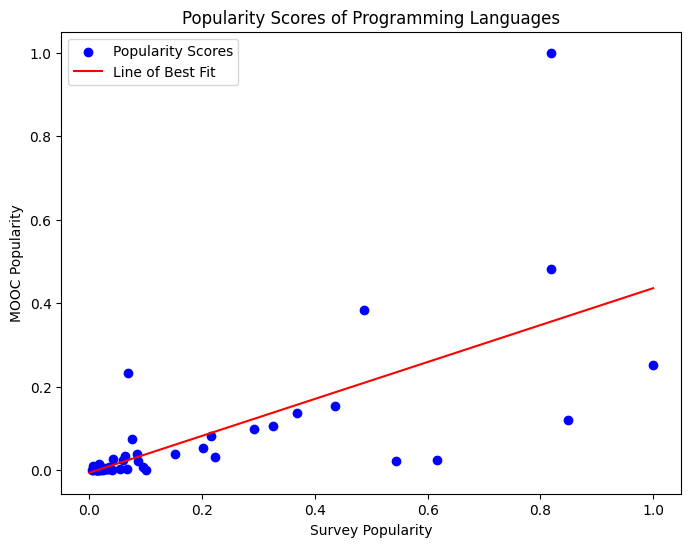

In [41]:
# Let's just take a look at what we have to start
plt.figure(figsize=(8, 6))
plt.scatter(language_popularity['survey'], language_popularity['mooc'], label='Popularity Scores', color='blue')

# Let's also calculate a line of best fit
slope, intercept = np.polyfit(language_popularity['survey'], language_popularity['mooc'], 1)
x_values = np.linspace(0, 1, 2)
plt.plot(x_values, slope * x_values + intercept, color='red', label='Line of Best Fit')

plt.xlabel('Survey Popularity')
plt.ylabel('MOOC Popularity')
plt.title('Popularity Scores of Programming Languages')
plt.legend()


In [42]:
# The 'difference' column shows us how far from the line of best fit the points are. As a result, we can
# isolate the languages that are the most over-saturated or under-saturated relative to the others.

print('The most over-saturated:')
display(language_popularity.sort_values('difference', ascending=False).head())

print("The most under-saturated:")
display(language_popularity.sort_values('difference').head())

The most over-saturated:


,skill,mooc,survey,predicted,difference
5,Python,1.000000,0.819348,0.356269,0.643731
16,R,0.232394,0.069215,0.024793,0.207602
3,Java,0.384977,0.486477,0.209177,0.175800
12,SQL,0.481221,0.818361,0.355833,0.125388
15,Swift,0.075117,0.075456,0.027551,0.047567


The most under-saturated:


,skill,mooc,survey,predicted,difference
2,HTML,0.119718,0.848608,0.369198,-0.249480
6,TypeScript,0.025822,0.617465,0.267059,-0.241237
0,Bash,0.021127,0.544436,0.234788,-0.213661
4,JavaScript,0.251174,1.000000,0.436097,-0.184923
11,PowerShell,0.032864,0.222127,0.092363,-0.059499


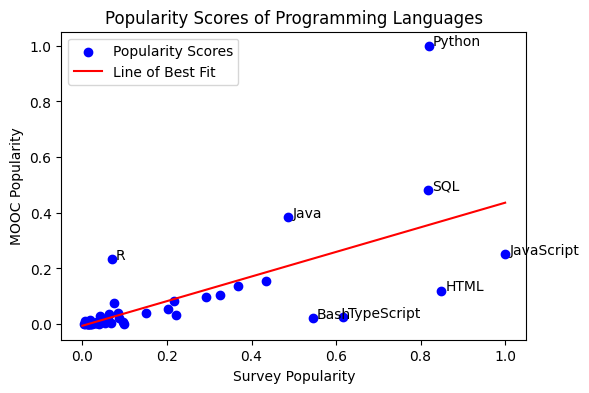

In [43]:
# Let's put all of this together onto a single chart.

def generate_chart(popularity_df, type, outlier_threshold):
    plt.figure(figsize=(6, 4))
    plt.scatter(popularity_df['survey'], popularity_df['mooc'], label='Popularity Scores', color='blue')

    # Here's the line of best fit
    slope, intercept = np.polyfit(popularity_df['survey'], popularity_df['mooc'], 1)
    x_values = np.linspace(0, 1, 100)
    plt.plot(x_values, slope * x_values + intercept, color='red', label='Line of Best Fit')

    # Let's also annotate the outliers.
    for _,row in popularity_df[popularity_df['difference'].abs() > outlier_threshold].iterrows():
        plt.annotate(row['skill'], (row['survey']+.01, row['mooc']))

    plt.xlabel('Survey Popularity')
    plt.ylabel('MOOC Popularity')
    plt.title(f'Popularity Scores of {type}')
    plt.legend()

generate_chart(language_popularity, 'Programming Languages', 0.1)

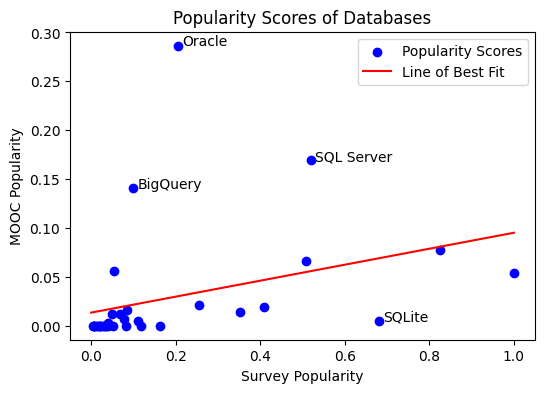

In [44]:
database_popularity = generate_popularity_df(databases, 'DatabasesUsedPastYear')
generate_chart(database_popularity, 'Databases', 0.05)

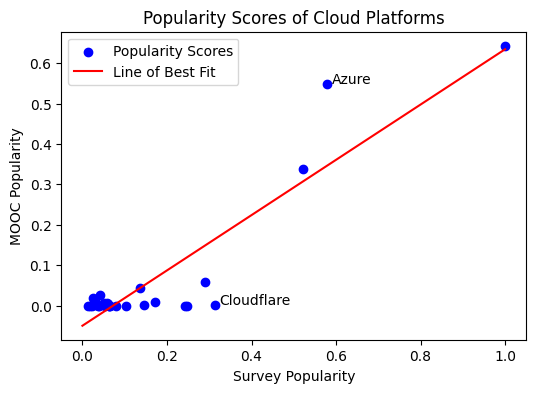

In [45]:
platform_popularity = generate_popularity_df(platforms, 'PlatformsUsedPastYear')
generate_chart(platform_popularity, 'Cloud Platforms', 0.15)

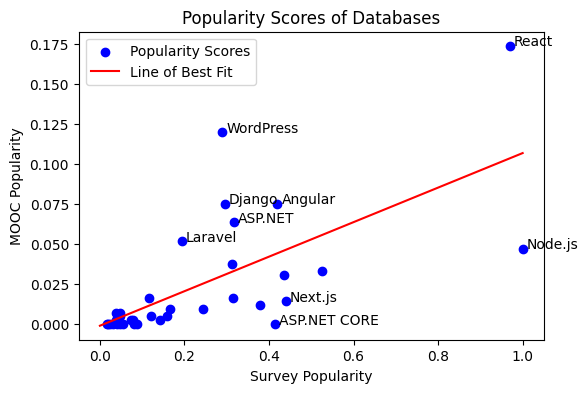

In [46]:
framework_popularity = generate_popularity_df(frameworks, 'WebFrameworksUsedPastYear')
generate_chart(framework_popularity, 'Databases', 0.03)

## Q1 Insights

__1. There are many skills that appear to be relatively over-saturated in MOOC education.__

However, these skills are likely still very valuable to learn even if they are not used in industry to the 
same extent. For example, Python is a common first language to learn when learning to code, but then students 
might switch to a language that is more specific to their work once they've secured a job.

__2. There are also many skills that appear to be relatively under-saturated in MOOCs.__

These theoretically represent skills with higher demand than the available MOOC content suggests. However, additional investigation is necessary before that conclusion is fully supported (see additional investigation #3).

## Q1 Additional Investigation

__1. We used a random subset of MOOC data from Udemy in this analysis to prevent oversaturating the MOOC dataset 
with Udemy data.__

Repeating this analysis with a larger Udemy dataset, or at least different random subsets,
would be beneficial for validating repeatable results.

__2. Investigate if there is a correlation between the saturation level of a skill and the salary of the skill
in industry.__

For example, since Python is over-saturated in MOOC content, does that mean there are more Python
programmers available, and therefore Python programmers are likely to have lower compensation?

__3. Investigate other ways of identifying the skills in MOOCs that are more accurate than searching course titles.__

For example, many web frameworks like React or Angular with use JavaScript, TypeScript, and HTML. If the course
title contained "Angular" but not the foundational skills of "JavaScript", "TypeScript", or "HTML", then we 
could end up with the foundational skills showing as under-represented in our results. 

[TOC](#content)

---

## Q2: What Tools did Developers of Different Levels Use?

In the previous question we answered what skills developers were most interested in from the entire survey. But realistically, there are different skill levels for each developer, which we assume would result in a different set of skills used.

So this question attempts to discover if there are any differences in the sets of tools used by developers of different skill levels. We rank the top 5 most popular skills of each developer skill level.

Since the Stack Overflow survey has no measure of skill level, we define a reasonable set of rules that assigns a skill level to a developer based on their responses to the survey.

We focus on a few columns and define these rules:
* `CodingStatus` - Their current professional experience as a coder
* `YearsCoding` - Number of years they have spent coding
* `YearsProfessionalCoding` - Number of years they have spent coding professionally

Rules:
1. Respondants who are "Learning to Code are labelled as Beginners
2. Respondants who are "Coding as a hobby" are default Beginners, unless they are above the 75th percentile threshold then they are Intermediate
3. Respondants who are "Former developers" are default Intermediate they generally have much higher years of coding experience compared to other categories. If they are above the 25th percentile, they are Advanced
4. Respondants who are "Not primarily developers" are labelled as Intermediate if they are above the 50th percentile and Advanced if above the 75th percentile. We feel this group will still gain relevant experience which makes them proficient but probably in specialised areas, therefore the threshold to be of higher skill level is higher than those that are primarily developers
5. Respondants who are "Primarily developers" are labelled as Intermediate if they are above the 50th percentile and Advanced if above the 75th percentile.

![Skill Level Decision Tree](assets/decision_tree.png)

Additional Notes:
* Many rules are created based on observing the quantile values and histogram distribution conditioned on the `CodingStatus`. Although this values could be considered arbitrary
* Majority of people are categorised as "Intermediate" which is to be expected since it's the default value

In [47]:
# Define rules for level assignment
def index_replace(l: list, ind: list, val: str) -> list:
  l[ind] = val
  return l

def perc(vals: list) -> (float, float, float):
  return np.percentile(vals, 25), np.percentile(vals, 50), np.percentile(vals, 75)

def assign_level(df: pd.DataFrame) -> pd.DataFrame:
  # Default value will be Intermediate
  sl = np.array(["Intermediate" for i in range(df.shape[0])])

  # Coding Status = Learner
  ind = df[df['CodingStatus'] == "I am learning to code"].index 
  sl = index_replace(sl, ind, "Beginner")

  # Coding Status = Hobby
  hobby = df[df['CodingStatus'] == "I code primarily as a hobby"]
  p25, p50, p75 = perc(hobby['YearsCoding'].dropna())
  sl = index_replace(sl, hobby.index, "Beginner") # Default value for this group is Beginner
  ind = hobby[hobby['YearsCoding'] >= p75].index
  sl = index_replace(sl, ind, "Intermediate") 

  # Coding Status = Used to be dev
  olddev = df[df['CodingStatus'] == "I used to be a developer by profession, but no longer am"]
  p25, p50, p75 = perc(olddev['YearsCoding'].dropna())
  sl = index_replace(sl, olddev.index, "Intermediate") # Default value for this group is Intermediate
  ind = olddev[olddev['YearsCoding'] > p25].index
  sl = index_replace(sl, ind, "Advanced") 

  # Coding Status = ptdev
  ptdev = df[df['CodingStatus'] == "I am not primarily a developer, but I write code sometimes as part of my work/studies"]
  p25, p50, p75 = perc(ptdev['YearsCodingProfessional'].dropna())
  sl = index_replace(sl, olddev.index, "Beginner") # Default value for this group is Beginner
  ind = ptdev[( ptdev['YearsCoding'] >= p50 ) & ( ptdev['YearsCoding'] < p75)].index
  sl = index_replace(sl, ind, "Intermediate") 
  ind = ptdev[ptdev['YearsCoding'] > p75].index
  sl = index_replace(sl, ind, "Advanced") 

  # Coding Status = dev
  dev = df[df['CodingStatus'] == "I am a developer by profession"]
  p25, p50, p75 = perc(dev['YearsCodingProfessional'].dropna())
  sl = index_replace(sl, olddev.index, "Beginner") # Default value for this group is Beginner
  ind = dev[( dev['YearsCoding'] >= p25 ) & ( dev['YearsCoding'] < p75)].index
  sl = index_replace(sl, ind, "Intermediate") 
  ind = dev[dev['YearsCoding'] > p75].index
  sl = index_replace(sl, ind, "Advanced") 

  return sl

In [48]:
# Take a subset of columns to define skill level
sub = df_so[['CodingStatus', 'AgeRange', 'CodingActivities', 'YearsCoding', 'YearsCodingProfessional', 'YearsWorkExperience']]

# YearsCoding and YearsCodingProfessional have <1 and >50 as values
# Replace these with 0 and 51 respectively to make data numerical for binning
sub.loc[sub['YearsCoding'] == "Less than 1 year", "YearsCoding"] = 0
sub.loc[sub['YearsCoding'] == "More than 50 years", "YearsCoding"] = 50
sub.loc[:, 'YearsCoding'] = sub.loc[:, 'YearsCoding'].astype(float)
sub.loc[sub['YearsCodingProfessional'] == "Less than 1 year", "YearsCodingProfessional"] = 0
sub.loc[sub['YearsCodingProfessional'] == "More than 50 years", "YearsCodingProfessional"] = 50
sub.loc[:, 'YearsCodingProfessional'] = sub.loc[:, 'YearsCodingProfessional'].astype(float)

# Assign skill level
skill_level = assign_level(sub)
df_so['SkillLevel'] = skill_level

In [49]:
# Uncomment to view: Plots that describe the distribution of each 'CodingStatus'
# fig, ax = plt.subplots(nrows=1, ncols=5)
# fig.set_figheight(10)
# fig.set_figwidth(30)

# status = sub['CodingStatus'].unique()
# for i in range(len(status)):
#   status_plot = sub[sub['CodingStatus'] == status[i]]['YearsCoding']
#   status_plot = status_plot.dropna()
#   ax[i].hist(status_plot)
#   ax[i].set_title(status[i])

# fig.tight_layout()

In [50]:
# Uncomment to view: Plots that describe the distribution of each 'CodingStatus'
# fig, ax = plt.subplots(nrows=1, ncols=2)
# fig.set_figheight(6)
# fig.set_figwidth(10)

# status = ['I am a developer by profession', 'I am not primarily a developer, but I write code sometimes\n as part of my work/studies']
# for i in range(len(status)):
#   status_plot = sub[sub['CodingStatus'] == status[i].replace('\n', '')]['YearsCodingProfessional']
#   status_plot = status_plot.dropna()
#   ax[i].hist(status_plot, color="#92bfab")
#   ax[i].set_title(status[i])

# fig.tight_layout()

In [51]:
# Only use the columns containing the skills and skill levels
cols = [
  'SkillLevel',
  'LanguagesUsedPastYear',
  'DatabasesUsedPastYear',
  'PlatformsUsedPastYear',
  'WebFrameworksUsedPastYear'
]
so_skills = df_so[cols]

# Convert to column values to lists
for col in cols[1:]:
  so_skills.loc[:, col] = so_skills.loc[:, col].apply(lambda x: literal_eval(x) if not pd.isna(x) else x)

In [52]:
# Uncomment to view a snippet of the skills table
# so_skills.head()

There are 4 columns that categorise different types of technologies:

1. Programming Languages
2. Databases
3. Cloud Platforms
4. Web Frameworks

For each type, we will extract the top 5 by count for each skill level of respondents. These will represent the most "popular" skills as demanded in the past year. We will plot this in a bar graph

In [53]:
# Define a skills column mapper for more readable names
skills_cols = {
  'LanguagesUsedPastYear': 'Languages',
  'DatabasesUsedPastYear': 'Databases',
  'PlatformsUsedPastYear': 'Cloud Platforms',
  'WebFrameworksUsedPastYear': 'Web Frameworks'
}

In [54]:
def get_top_5_tech(df: pd.DataFrame, col: str) -> pd.DataFrame:
  df1 = df[col]
  df1 = (df1
    .explode()
    .value_counts()
    .sort_values() 
  )[-5:]
  df1 = df1.reset_index()

  return df1

Here we create a combined plot that shows the most used skills for each category at the selected level.

⚠️ NOTE: Change the `LEVEL` parameter to "Beginner", "Intermediate", "Advanced" to see results for different levels

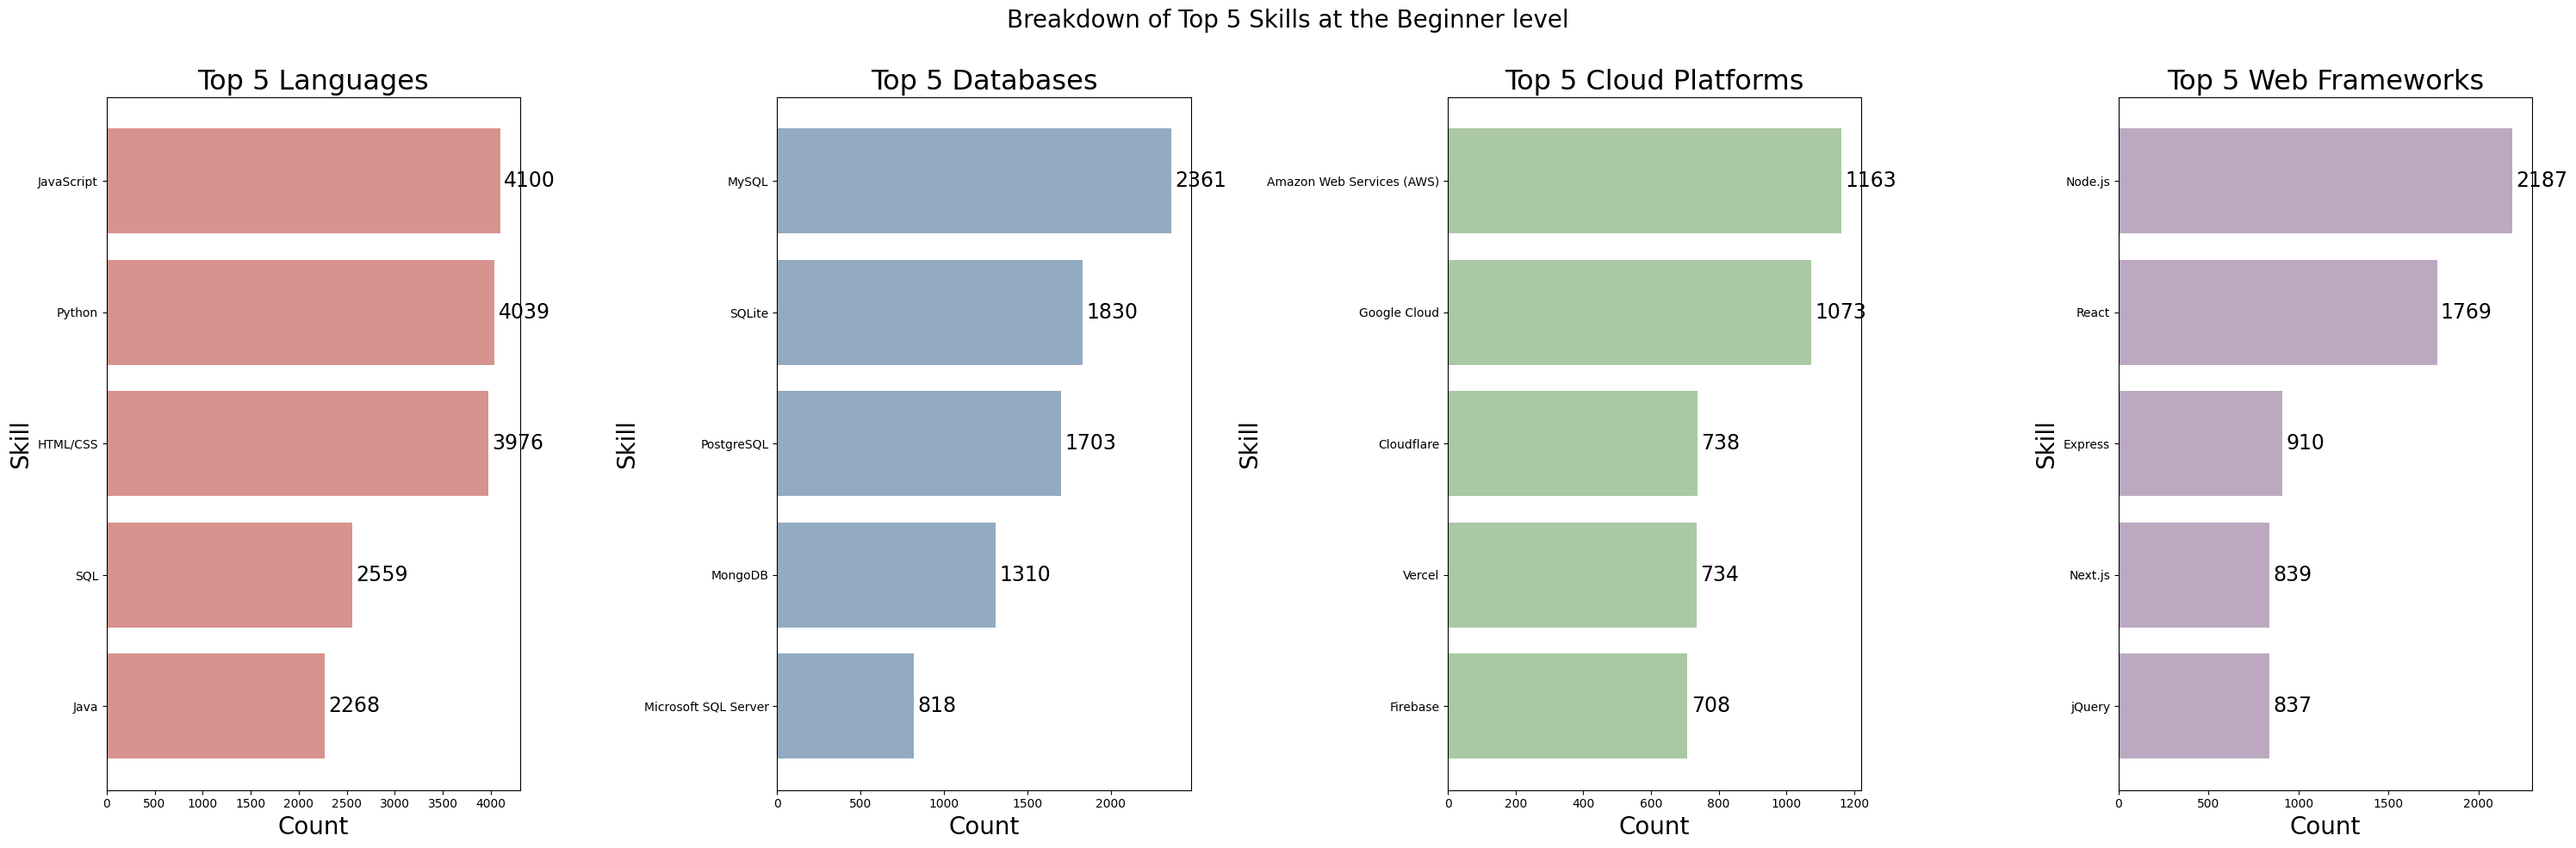

In [83]:
# Overarching skill level
LEVEL = "Beginner"
FS = 20

# Split data by skill level
df_skill = so_skills[so_skills['SkillLevel'] == LEVEL]

# Setup diagram for plotting
fig, ax = plt.subplots(nrows=1, ncols=4)
fig.set_figheight(10)
fig.set_figwidth(30)

colours = ["#d7938e", "#92abc0", "#aac8a4", "#bca9c1"]
for i in range(len(skills_cols)):
  # Get top 5 technologies for each category
  dfp = get_top_5_tech(df_skill, list(skills_cols.keys())[i])

  # Plot
  bars = ax[i].barh(dfp[list(skills_cols.keys())[i]], dfp['count'], color=colours[i])
  for bar in bars:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax[i].annotate(f'{width}', xy=(width, y), xytext=(3, 0), textcoords='offset points', va='center', fontsize=FS-3)
  ax[i].set_title(f"Top 5 {skills_cols[list(skills_cols.keys())[i]]}", fontsize=FS+3)
  ax[i].set_ylabel("Skill", fontsize=FS)
  ax[i].set_xlabel("Count", fontsize=FS)

fig.suptitle(f"Breakdown of Top 5 Skills at the {LEVEL} level\n", fontsize=20)
fig.tight_layout()

## Q2 Insights

Majority of the skills stay relatively the same across different developer skill levels. However, we do have some interesting observations:

1. Bash/Shell is only seen in the "Advanced" skill level, which could suggest that developers with higher skill tend to work directly with CLIs more compared to UIs
2. PostgreSQL and MySQL dominate the database space regardless of skill level
3. While AWS reigns supreme amongst the Cloud Platforms, Microsoft Azure slowly increases in popularity as skill levels increase. It could be that Azure as a platform is more professional focused and more "Advanced" skilled developers are primarily using it for work purposes, while AWS is an all-rounder, serving both enterprise and consumer users

These are just some possible reasons, and further research will be needed to substantiate these claims. We however, do not have the data to perform such justifications.

## Q2 Additional Investigation

__1. Improve definition of skill level__

Our definition of skill level based on distributions of respondants and other details might not be reflective of the actual skill level. A deeper analysis of what constitutes someone skill level could be done to achieve better results. Another alternative would be to consider including "Estimated Skill Level" as a potential survey response in the future. Although it is biased on the developers response, perceived skill level would probably still be a better indicator than our method here.

[TOC](#content)

---

# Q3: Are there Sufficient Courses at each Skill Level?

The next question that follows is, are there sufficient courses offered by online platforms to impart skills that developers have used over the past year?

To measure whether courses provide the necessary courses for each of these top 5 skills, we perform a naive matching of skill labels to the Course Name, Description, Skills and Organization based on the level of the developer.

There are many different names for various technologies (e.g Amazon Web Service, AWS, AWS Cloud, and many of the different services) as such we might not match every instance across every course. But this naive approach provides a preliminary idea of the number of courses that match the skills used by developers over the past year.

In [56]:
# Combine texts from course names, descriptions, skills and organization into single string
df_mooc['desc_comb'] = ""
for i in range(df_mooc.shape[0]):
  try:
    df_mooc.loc[i, 'desc_comb'] = " ".join(
      df_mooc['skills'][i] + 
      [df_mooc['description'][i]] + 
      [df_mooc['course_name'][i]] +
      [df_mooc['organization'][i]]
    )
  except Exception:
    df_mooc.loc[i, 'desc_comb'] = " ".join([
      str(df_mooc['description'][i]),
      str(df_mooc['course_name'][i]),
      str(df_mooc['organization'][i])
    ])

We define a function that assigns $1$ to a course if the skill exists in the combined description containing skills, course description, organisation and name and $0$ otherwise.

In [57]:
# Maps different technology names to their alternative names for more comprehensive matching
skills_mapper = {
  'html/css': ['html/css', 'html', 'css'],
  'microsoft sql server': ['microsoft sql server', 'sql server'],
  'amazon web services (aws)': ['amazon web services (aws)', 'aws'],
  'google cloud': ['google cloud', 'gcloud', 'gcp'],
  'node.js': ['node.js', 'nodejs', 'node'],
  'next.js': ['next.js', 'nextjs']
}

def map_skills_to_courses(df: pd.DataFrame, level: str | None, skill_type: str) -> pd.DataFrame:
  # Get top 5 skills in a list
  if level is not None:
    df_skills = df[df['level'] == level].reset_index()
  else:
    df_skills = df.copy()
  dfp = get_top_5_tech(df_skill, skill_type)
  skills = dfp[skill_type].to_list()

  # Create a column that represents if the skill_match is in the combined description
  for skill in skills:
    skill_match = skill.lower()

    # Check if there is an alternative name in the skills_mapper
    vals = []
    if skill_match in skills_mapper.keys():
      skill_match = skills_mapper[skill_match]

    # If the type is a string, do a direct match with every word
    # If it is a list, check if any value in the list matches
    if isinstance(skill_match, str):
      for i in range(df_skills.shape[0]):
        to_match = df_skills.loc[i, 'desc_comb'].lower().split(' ')
        if skill_match in to_match:
          vals.append(1)
        else:
          vals.append(0)
    else:
      for i in range(df_skills.shape[0]):
        to_match = df_skills.loc[i, 'desc_comb'].lower().split(' ')
        if any(value in to_match for value in skill_match):
          vals.append(1)
        else:
          vals.append(0)

    df_skills[skill] = vals   

  return df_skills

Now we can compare within the selected skill level and skill category

<u>Skill Level</u>

1. Beginner
2. Intermediate
3. Advanced

<u>Skills Category</u>

1. Languages
2. Databases
3. Cloud Platforms
4. Web Frameworks

⚠️ NOTE: Change the `LEVEL` & `SKILL_CAT` parameter to the above options to see results for different skills levels and categories

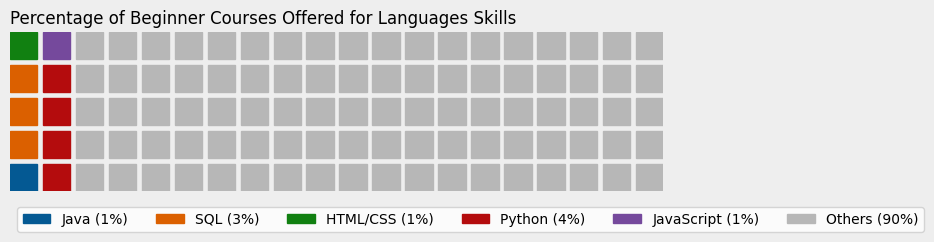

In [58]:
LEVEL = "Beginner"
SKILL_CAT = "Languages"

rev_map = {v:k for k, v in skills_cols.items()}
st = rev_map[SKILL_CAT]
course_skills = map_skills_to_courses(df_mooc, LEVEL, st)

# Separate out the columns which show matched values and sum them together
course_cols = course_skills.columns[-5:]
matched_courses = course_skills[course_cols]
matched_courses = matched_courses.sum().reset_index()
matched_courses.columns = ['skills', 'count']
matched_courses.loc[len(matched_courses)] = ['Others', len(course_skills) - sum(matched_courses['count'])]
matched_courses['perc'] = (matched_courses['count'] / len(course_skills)) * 100

# Display waffle plot of percentages
data = {k: v for k, v in zip(matched_courses['skills'], matched_courses['perc'])}
fig = plt.figure(
  FigureClass=Waffle,
  rows=5,
  values=data,
  colors=("#045993", "#db6000", "#118011", "#b40c0d", "#75499c", "#b7b7b7"),
  title={'label': f"Percentage of {LEVEL} Courses Offered for {SKILL_CAT} Skills", 'loc': 'left'},
  labels=[f"{k} ({round(v)}%)" for k, v in data.items()],
  legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.3), 'ncol': len(data)},
  figsize=(9, 5)
)

fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()

## Q3 Insights

__1. Most skills are covered by courses (as represented by our dataset)__

Assuming there are no skills overlap between courses, the top programming related skills cover about 25% of all available courses in our dataset. This is significant since it suggests that there are many courses available to cater to developers needs.

__2. Most courses are geared toward programming languages__

Programming Language based skills take up about 20% of all courses, much larger than any other group of skills. This is expected since it's the foundation of any software-related skill, therefore we'd expect there to be many courses using it as the foundation for any course. Meanwhile looking into specific frameworks or technologies, the percentage decreases. Since these are subsets of the programming language, we would expect there to be lesser courses as well.

## Q3 Additional Investigation

__1. Exact string matching might not be the best method to find relationships between skills and other textual details__

- A better method would be to encode textual information numericals (e.g word embeddings) and use a similary score to measure "closeness" of each skill to the course description
- Semantically these would be more similar since the numerical representation would also capture more distinct features of th language used

__2. Many different textual representation of skills__

- Skill doesn't match because it's too specific (e.g "Microsoft SQL Server").
- Skill naming might be different (e.g Javascript, JS, JScript)
- Skill names being technologies might not be captured in course description (e.g Javascript is usually used for web development, but we will not match web development courses because the description might not contain the "Javasript" term)

[TOC](#content)

---

# Q4: How Long Does it Take to Develop These Skills?

Finally, one assumption we have is that more advanced topics would take longer to learn. So for each skill level does this assumption hold for the different skills developers have listed?

As a proxy, we use the course duration to determine the "time it takes to learn that skill". Obviously, this is not the best metric, but given that these courses are curated by institutions and experts, we would assume that the course length is a good estimate to how long it would take to pick up these skills.

<u>Skills Category</u>

1. Languages
2. Databases
3. Cloud Platforms
4. Web Frameworks

⚠️ NOTE: Change the `SKILL_CAT` and then `SKILL` parameter to the above options to see results for different skills at different levels

In [59]:
SKILL_CAT = "Languages"

rev_map = {v:k for k, v in skills_cols.items()}
st = rev_map[SKILL_CAT]
all_course_skills = map_skills_to_courses(df_mooc, None, st)
l_skills = all_course_skills.columns[-5:]

print("The list of skills to choose from are:")
for i in range(len(l_skills)):
  print(f"{i+1}: {l_skills[i]}")

The list of skills to choose from are:
1: Java
2: SQL
3: HTML/CSS
4: Python
5: JavaScript


(-20.0, 200.0)

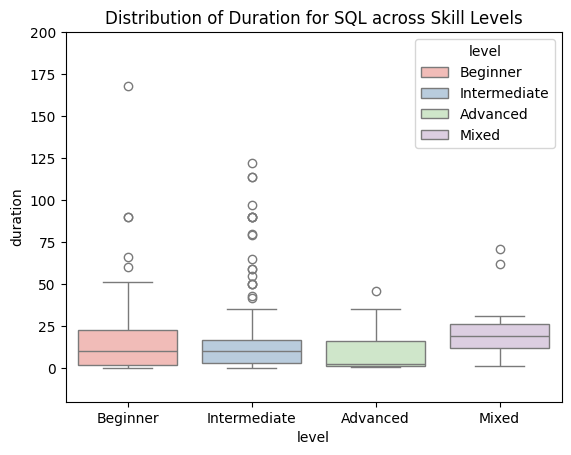

In [60]:
SKILL = "SQL"

# Subset the data based on skill selected
df_duration = all_course_skills[['duration', 'level', SKILL]]
df_duration = df_duration[df_duration[SKILL] == 1]

sns.boxplot(
  data=df_duration,
  x='level',
  y='duration',
  hue='level'
)
plt.title(f"Distribution of Duration for {SKILL} across Skill Levels")
plt.ylim(-20, 200)

## Q4 Insights

__1. Minor variation between different skill levels__

Contrary to our expectations we see very minor variation between different skill levels. The boxplots between each level differ only in some cases and maintin a rather similar shape across the skill levels and skills. In fact, there are some skills where Beginners take a longer time on average (e.g SQL), a reverse of what we expected. 

A possible reason could be that since these are beginner courses, more time might be spent introducing the foundational topics, and spent on explanations rather than diving deep into the topics covered. The suggested duration of the course might be slightly inflated to account for a beginner's pace of learning.

## Q4 Additional Investigation

__1. Another measure of time taken should be used__

Ultimately, the duration of a course is only a proxy for the time taken to learn a skill. Many other factors like total content covered, speed of learning, past experience with content are major factors that impact the duration it takes to pick up a skill (previous years of experience with other programming languages, time spent in the industry, etc.)

In [61]:
df_mooc.head()

,type,course_name,organization,rating,description,skills,level,duration,reviews,enrollments,subject,provider,language,reviews_comments,reviews_stars,reviews_avg_stars,num_reviews,premium,desc_comb
0,course,AWS Lambda إنشاء صورة مصغرة بإستخدام السيرفرل...,Coursera Project Network,NaN,هذا المشروع التفاعلي -إنشاء صورة مصغرة بإستخدا...,"[AWS Identity And Access Management (IAM), Clo...",Intermediate,2.0,NaN,NaN,NaN,coursera,ar,NaN,NaN,NaN,NaN,NaN,AWS Identity And Access Management (IAM) Cloud...
1,course,Assisting Public Sector Decision Makers With ...,University of Michigan,4.8,Develop data analysis skills that support publ...,"[Simulations, Statistical Analysis, Predictive...",Intermediate,16.0,[{'comment': 'This course was very good at get...,NaN,NaN,coursera,en,[wonderful],[5],5.0,1.0,NaN,Simulations Statistical Analysis Predictive Mo...
2,course,Advanced Strategies for Sustainable Business,University of Colorado Boulder,NaN,This course focuses on integrating sustainabil...,"[Circular Economy, Sustainable Business, Stake...",Beginner,6.0,NaN,NaN,NaN,coursera,en,NaN,NaN,NaN,NaN,NaN,Circular Economy Sustainable Business Stakehol...
3,course,Applying Machine Learning to Your Data with G...,Google Cloud,NaN,"Dans ce cours, nous définirons ce qu'est le ma...",NaN,Beginner,10.0,NaN,NaN,NaN,coursera,fr,NaN,NaN,NaN,NaN,NaN,"Dans ce cours, nous définirons ce qu'est le ma..."
4,project,Automate Blog Advertisements with Zapier,Coursera Project Network,NaN,Zapier is the industry leader in task automati...,"[Advertising, Social Media, Blogging, Marketing]",Intermediate,2.0,"[{'comment': 'wonderful', 'stars': 5}]",NaN,NaN,coursera,en,"[Very good way of teaching., Good, Good]","[5, 5, 5]",5.0,3.0,NaN,Advertising Social Media Blogging Marketing Za...
